### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [3]:
import pandas as pd
import yfinance as yf

# Fetch the data for "LICI.NS"
df = yf.download("LICI.NS")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,LICI.NS,LICI.NS,LICI.NS,LICI.NS,LICI.NS
Date,,,,,
2022-05-17,856.956543,899.743188,842.025281,853.774471,48792877
2022-05-18,858.033569,872.377397,855.830596,867.041294,8919761
2022-05-19,823.275574,848.879043,820.485165,848.879043,7372427
2022-05-20,808.882812,838.892167,807.756825,830.814598,7078291
2022-05-23,799.777161,834.877903,786.853099,808.882831,12444648


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,LICI.NS,LICI.NS,LICI.NS,LICI.NS,LICI.NS
Date,,,,,
2025-01-23,837.250000,840.900024,824.500000,828.500000,713322
2025-01-24,821.250000,839.900024,820.000000,839.500000,529524
2025-01-27,809.049988,821.000000,807.450012,820.599976,711008
2025-01-28,818.650024,825.950012,805.000000,816.150024,1267694
2025-01-29,828.200012,835.549988,820.250000,824.400024,938039


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

Ticker,LICI.NS
0,856.956543
1,858.033569
2,823.275574
3,808.882812
4,799.777161
...,...
665,837.250000
666,821.250000
667,809.049988
668,818.650024


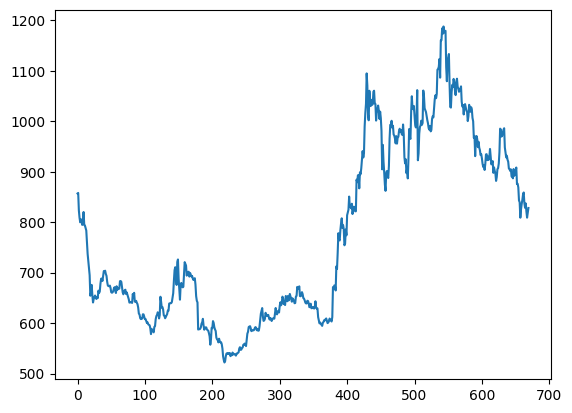

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
df1

Ticker,LICI.NS
0,856.956543
1,858.033569
2,823.275574
3,808.882812
4,799.777161
...,...
665,837.250000
666,821.250000
667,809.049988
668,818.650024


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.50294325],
       [0.5045599 ],
       [0.45238705],
       [0.43078306],
       [0.41711519],
       [0.42630058],
       [0.42218557],
       [0.40947306],
       [0.42409612],
       [0.44783118],
       [0.40895855],
       [0.40763589],
       [0.40072862],
       [0.39271893],
       [0.35906372],
       [0.32327753],
       [0.30130607],
       [0.2772772 ],
       [0.25964136],
       [0.19872388],
       [0.20761546],
       [0.23090949],
       [0.20034044],
       [0.17858959],
       [0.18865679],
       [0.1942415 ],
       [0.1992384 ],
       [0.19416811],
       [0.18902426],
       [0.1936536 ],
       [0.19152262],
       [0.21378798],
       [0.20702757],
       [0.2110691 ],
       [0.23406922],
       [0.24928027],
       [0.24972112],
       [0.24251985],
       [0.25728977],
       [0.27213344],
       [0.27125154],
       [0.27308871],
       [0.26346229],
       [0.25787767],
       [0.24024174],
       [0.22899884],
       [0.22730881],
       [0.227

In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(435, 235)

In [18]:
train_data

array([[0.50294325],
       [0.5045599 ],
       [0.45238705],
       [0.43078306],
       [0.41711519],
       [0.42630058],
       [0.42218557],
       [0.40947306],
       [0.42409612],
       [0.44783118],
       [0.40895855],
       [0.40763589],
       [0.40072862],
       [0.39271893],
       [0.35906372],
       [0.32327753],
       [0.30130607],
       [0.2772772 ],
       [0.25964136],
       [0.19872388],
       [0.20761546],
       [0.23090949],
       [0.20034044],
       [0.17858959],
       [0.18865679],
       [0.1942415 ],
       [0.1992384 ],
       [0.19416811],
       [0.18902426],
       [0.1936536 ],
       [0.19152262],
       [0.21378798],
       [0.20702757],
       [0.2110691 ],
       [0.23406922],
       [0.24928027],
       [0.24972112],
       [0.24251985],
       [0.25728977],
       [0.27213344],
       [0.27125154],
       [0.27308871],
       [0.26346229],
       [0.25787767],
       [0.24024174],
       [0.22899884],
       [0.22730881],
       [0.227

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(429, 5)
(429,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(229, 5)
(229,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/Users/mayank/Downloads/Stock-prediction-main/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0553 - val_loss: 0.3282
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0227 - val_loss: 0.1082
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0148 - val_loss: 0.0646
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - val_loss: 0.1056
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0081 - val_loss: 0.0362
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0041 - val_loss: 0.0093
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0019 - val_loss: 0.0077
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - val_loss: 0.0419
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - val_loss: 0.0066
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0108
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0015 - val_loss: 0.0049
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0013 - val_loss: 0.0114


In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.18.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

667.1535099298845

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1024.2413422577204

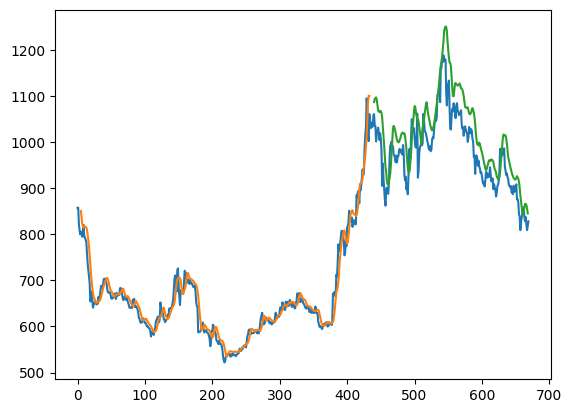

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

235

In [38]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 5)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.4733631023274051,
 0.4493465968432896,
 0.43103399308851176,
 0.44544395134839976,
 0.4597787847360918]

In [41]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4736164]
6
1 day input [0.4493466  0.43103399 0.44544395 0.45977878 0.47361639]
1 day output [[0.47124723]]
2 day input [0.43103399 0.44544395 0.45977878 0.47361639 0.47124723]
2 day output [[0.47721696]]
3 day input [0.44544395 0.45977878 0.47361639 0.47124723 0.47721696]
3 day output [[0.4886656]]
4 day input [0.45977878 0.47361639 0.47124723 0.47721696 0.48866561]
4 day output [[0.4980864]]
5 day input [0.47361639 0.47124723 0.47721696 0.48866561 0.49808639]
5 day output [[0.5061412]]
6 day input [0.47124723 0.47721696 0.48866561 0.49808639 0.50614119]
6 day output [[0.51334214]]
7 day input [0.47721696 0.48866561 0.49808639 0.50614119 0.51334214]
7 day output [[0.5232021]]
8 day input [0.48866561 0.49808639 0.50614119 0.51334214 0.52320212]
8 day output [[0.53365654]]
9 day input [0.49808639 0.50614119 0.51334214 0.52320212 0.53365654]
9 day output [[0.5436775]]
10 day input [0.50614119 0.51334214 0.52320212 0.53365654 0.54367751]
10 day output [[0.55394524]]
11 day input [0.513

In [42]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

670

In [45]:
465-5

460

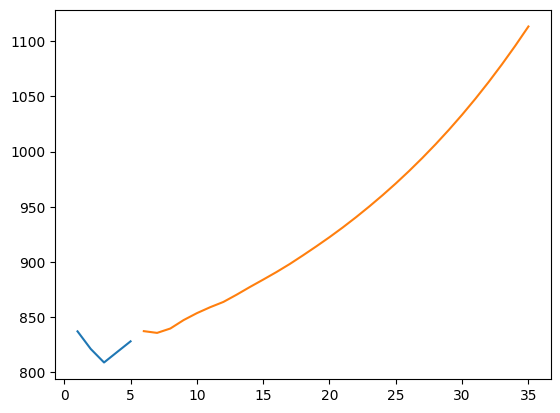

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

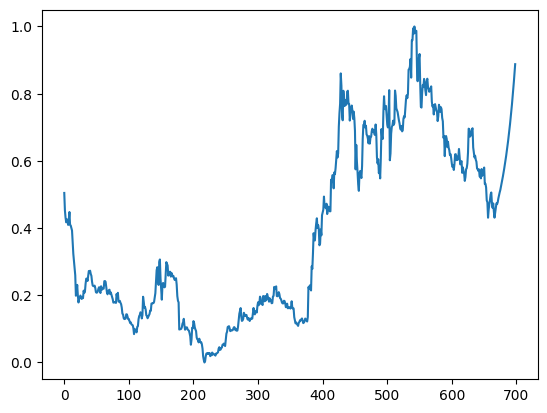

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

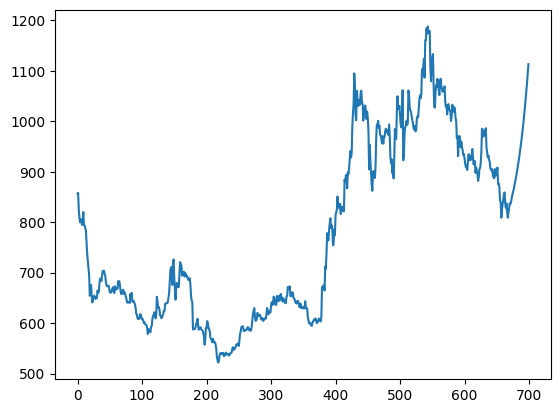

In [49]:
plt.plot(df3)